In [58]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [59]:
df = pd.read_csv('data.csv')

In [60]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


### Data Preperation

In [61]:
df = df.iloc[:, 1:].copy() # droppe erste Spalte

In [62]:
df.shape

(251079, 14)

In [63]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [64]:
df.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

-> viele Spalten werden von pandas als object abgespeichert obwohl sie laut Spaltenüberschrift floats oder integers (z.B. year) sein sollten

Vermutung: in den Spalten steht teilweise nicht das, was es sein sollte

In [65]:
df[~df['year'].astype(str).str.fullmatch(r'\d{4}')] # anhand der Spalte year selecten wir alles, wo nicht 4 ziffern in der spalte 'year' auftreten

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
2400,audi,Audi A4,grey,Manual,Petrol,KLIMAAUTOMATIK*,"7,8 l/100 km",75,Manual,07/2004,187 g/km,2004,2460.0,Avant 1.6 *TÜV 09/23
2743,audi,Audi A4,silver,8449,Automatic,Automatik,2005,194 g/km,Automatic,74.194 km,Petrol,11/2005,NaN,Lim. 2.0
5297,audi,Audi A1,blue,8999,Manual,6-Gang,2011,126 g/km,Manual,110.250 km,Petrol,04/2011,NaN,1.4 TFSI Ambition
9616,audi,Audi A1,white,Manual,Petrol,XEN AAC SHZ FSP APS 5TRG,"5,4 l/100 km",90,Manual,06/2014,128 g/km,2014,12250.0,Sportback Sportline
12206,audi,Audi A6,black,Manual,Diesel,NAVplus LEDER PANO ALC,"4,6 l/100 km",140,Manual,12/2016,119 g/km,2016,21250.0,Avant 2.0 TDI ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241462,volkswagen,Volkswagen Passat Variant,silver,Manual,Diesel,Navi uvm,4 l/100 km,110,Manual,06/2020,104 g/km,2020,20900.0,2.0 TDI SCR - Business Premium Paket
242569,volkswagen,Volkswagen up!,red,18.200 km,06/2021,PDC,112 g/km,"4,9 l/100 km",Manual,Manual,2021,Petrol,NaN,GTI - KAMERA
242579,volkswagen,Volkswagen up!,red,8.500 km,07/2021,Beats-Soundsystem,112 g/km,"4,9 l/100 km",Manual,Manual,2021,Petrol,NaN,GTI - KAMERA
246113,volkswagen,Volkswagen up!,red,Manual,Petrol,SHZ,"4,9 l/100 km",85,Manual,03/2023,112 g/km,2023,23590.0,GTI - Beats SOUNDSYSTEM. KAMERA


- Man erkennt, das bei den Daten irgendwas nicht richtig funktioniert hat
- leider lässt sich auch kein wirkliches muster erkennen
- Da sich die Anzahl mit 198 (von 251000) Zeilen in Grenzen hält, würde ich erstmal alles droppen

In [66]:
df = df.loc[df['year'].astype(str).str.fullmatch(r'\d{4}')].copy()

In [67]:
df['year'].value_counts()

year
2019    29225
2018    24095
2023    21097
2022    20653
2017    18940
2020    18566
2021    16022
2016    15072
2015    12712
2014    10623
2013     9325
2012     7992
2011     7384
2009     6431
2010     6043
2008     4847
2007     4018
2006     3973
2005     3399
2004     2649
2003     2101
2002     1581
2001     1216
2000      963
1999      744
1998      469
1997      343
1996      227
1995      170
3700        1
Name: count, dtype: int64

In [68]:
df[df['year'] == '3700']

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
25605,bmw,BMW 318,grey,S/H,3700,ROSTHREI,03/2006,Petrol,Manual,KETTE NEUE,Manual,200.000 km,NaN,i TÜV 03/2025


diese Zeile muss auch noch gedroppt werden -> können auf die anderen Werte einfiltern

In [69]:
yearsToFilter = list(df['year'].unique()[:29])
print(yearsToFilter)
filt = [val in yearsToFilter for val in df['year']]
df = df[filt].copy()

['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [70]:
df['year'].value_counts()

year
2019    29225
2018    24095
2023    21097
2022    20653
2017    18940
2020    18566
2021    16022
2016    15072
2015    12712
2014    10623
2013     9325
2012     7992
2011     7384
2009     6431
2010     6043
2008     4847
2007     4018
2006     3973
2005     3399
2004     2649
2003     2101
2002     1581
2001     1216
2000      963
1999      744
1998      469
1997      343
1996      227
1995      170
Name: count, dtype: int64

-> sieht jetzt gut aus

In [71]:
df.shape

(250880, 14)

In [72]:
df.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

Ordne die richtigen Datatypes zu

In [73]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['year'] = pd.to_numeric(df['year'])
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'])
df['power_kw'] = pd.to_numeric(df['power_kw'])
df['power_ps'] = pd.to_numeric(df['power_ps'])

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_10348/2545824395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['registration_date'] = pd.to_datetime(df['registration_date'])


In [74]:
df.tail()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
251074,volvo,Volvo XC40,white,2023-04-01,2023,57990,192.0,261.0,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,2023-03-01,2023,89690,173.0,235.0,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,2023-05-01,2023,61521,145.0,197.0,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,2023-05-01,2023,57890,132.0,179.0,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk
251078,volvo,Volvo XC40,gold,2023-03-01,2023,52900,160.0,218.0,Automatic,Electric,NaN,438 km Reichweite,50.0,Ultimate Recharge Twin Motor AHK GJR


Die Spalte fuel_consumption_l_100km	und fuel_consumption_g_km lassen sich nicht direkt als float übersetzen, da sie string werte z.B. g/km enthalten. Außerdem fällt hier auf, dass für Elekro und Hybrid Autos hier andere Werte hinterlegt sind. Dies gilt es als nächstes zu untersuchen.

Fix fuel_consumption_g_km

In [75]:
df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)] # alle Spalten, bei denen in fuel_consumption_g_km nicht g/km steht

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_10348/175050944.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)] # alle Spalten, bei denen in fuel_consumption_g_km nicht g/km steht


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
1115,alfa-romeo,Alfa Romeo Tonale,grey,2022-12-01,2022,55190,206.0,280.0,Automatic,Hybrid,NaN,62 km Reichweite,4800.0,SPECIALE 1.3 PHEV 280PS PREMIUM WINTERPAKET NAV
1125,alfa-romeo,Alfa Romeo Tonale,green,2022-12-01,2022,61850,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1648.0,VELOCE 1.3T MultiAir Plug-In Hybrid
1168,alfa-romeo,Alfa Romeo Tonale,red,2022-12-01,2022,58000,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1500.0,Veloce PHEV 1.3T Multiair 280PS Allrad
1194,alfa-romeo,Alfa Romeo Tonale,black,2022-12-01,2022,52950,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1500.0,PHEV Plug-In VELOCE *Premium-P.*Assistenz-P.*W...
1195,alfa-romeo,Alfa Romeo Tonale,black,2022-12-01,2022,53150,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1500.0,PHEV Plug-In VELOCE *Premium-P.*Assistenz-P.*W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251045,volvo,Volvo XC60,black,2023-03-01,2023,74970,335.0,455.0,Automatic,Hybrid,93 km (Ort),77 km Reichweite,8000.0,Recharge T8 Plus Bright Standheizung/LED
251056,volvo,Volvo C40,black,2023-05-01,2023,60520,170.0,231.0,Automatic,Electric,NaN,400 km Reichweite,3000.0,Ultimate 2WD Recharge Pure Electric
251074,volvo,Volvo XC40,white,2023-04-01,2023,57990,192.0,261.0,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251077,volvo,Volvo XC40,white,2023-05-01,2023,57890,132.0,179.0,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [76]:
df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)]['fuel_type'].value_counts()

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_10348/3939575175.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)]['fuel_type'].value_counts()


fuel_type
Electric         3032
Hybrid           1218
Diesel            845
Diesel Hybrid      50
Petrol             42
Other              38
Unknown             4
LPG                 1
Name: count, dtype: int64

Es sind also hauptsächlich Elektrische und Hybride Fahrzeuge. Warum gibt es aber auch hier Diesel und Petrol?

In [77]:
df[
    ~df['fuel_consumption_g_km'].str.contains(r'g/km', na=True) &
    df['fuel_type'].isin(['Petrol', 'Diesel'])
].head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
17157,audi,Audi Q5,green,2019-08-01,2019,44990,185.0,252.0,Automatic,Petrol,NaN,45 km Reichweite,53950.0,TFSI e 55 quattro 270(367) kW(PS) S tronic
19190,audi,Audi Q5,black,2020-06-01,2020,39470,270.0,367.0,Automatic,Petrol,NaN,45 km Reichweite,114680.0,S line 55TFSI e Navi LED Panorama B&O DAB GRA
20104,audi,Audi A3,black,2021-04-01,2021,25970,150.0,204.0,Automatic,Petrol,NaN,59 km Reichweite,31210.0,40TFSI e Stronic Klimaautomatik GRA
20108,audi,Audi Q5,black,2021-01-01,2021,39970,220.0,299.0,Automatic,Petrol,NaN,45 km Reichweite,43120.0,S-Line 50TFSI e qu. Stronic Navi LED GRA EPH
20222,audi,Audi Q5,silver,2021-02-01,2021,42870,220.0,299.0,Automatic,Petrol,NaN,45 km Reichweite,48900.0,S line 50TFSI e Navi LED ACC DAB virtual AHK


In [78]:
df[
    ~df['fuel_consumption_g_km'].str.contains(r'g/km', na=True) &
    df['fuel_type'].isin(['Petrol', 'Diesel'])
]['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
-/-                  875
45 km Reichweite       5
203 km Reichweite      2
59 km Reichweite       1
200 km Reichweite      1
440 km Reichweite      1
318 km Reichweite      1
460 km Reichweite      1
Name: count, dtype: int64

Beim Großteil fehlen also einfach die Werte. Replace -/- mit nan Werten

In [79]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace('-/-', np.nan) # replace -/- mit nan werten

Erste Idee: erstelle eine neue Spalte für die Reichweite für Elektrofahrzeuge/Hybriden

In [80]:
condition = ~df['fuel_consumption_g_km'].str.contains(r'g/km', na=True)
# Neue Spalte mit den gefilterten Werten
df['electric_range_km'] = df.loc[condition, 'fuel_consumption_g_km']
df['electric_range_km'] = df['electric_range_km'].str.split().str[0].astype(float) #zu float machen
# Originalspalte an den Stellen auf NaN setzen
df.loc[condition, 'fuel_consumption_g_km'] = np.nan

In [81]:
df['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
- (g/km)      35809
0 g/km         8533
119 g/km       4813
114 g/km       3882
139 g/km       3389
              ...  
130,1 g/km        1
5,7 g/km          1
135,8 g/km        1
146,3 g/km        1
24,3 g/km         1
Name: count, Length: 1013, dtype: int64

Replace alles was 0 g/km oder - (g/km) ist mit NaN Werten

In [82]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace(['0 g/km', '- (g/km)'], np.nan) #replace mit nan Werten
df['fuel_consumption_value'] = (
    df['fuel_consumption_g_km']
    .str.replace('.', '', regex=False)   # Punkte (Tausender) entfernen
    .str.replace(',', '.', regex=False)  # Komma (Dezimal) durch Punkt ersetzen
    .str.split().str[0]                  # ersten Teil extrahieren
    .astype(float)                       # in Float umwandeln
)

In [83]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,electric_range_km,fuel_consumption_value
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1995,1300,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB,NaN,260.0
1,alfa-romeo,Alfa Romeo 164,black,1995-02-01,1995,24900,191.0,260.0,Manual,Petrol,NaN,NaN,190000.0,"Q4 Allrad, 3.2L GTA",NaN,NaN
2,alfa-romeo,Alfa Romeo Spider,black,1995-02-01,1995,5900,110.0,150.0,Unknown,Petrol,NaN,NaN,129000.0,ALFA ROME 916,NaN,NaN
3,alfa-romeo,Alfa Romeo Spider,black,1995-07-01,1995,4900,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L,NaN,225.0
4,alfa-romeo,Alfa Romeo 164,red,1996-11-01,1996,17950,132.0,179.0,Manual,Petrol,"7,2 l/100 km",NaN,96127.0,"3.0i Super V6, absoluter Topzustand !",NaN,NaN


**fuel_consumption_g_km fertig gecleaned!**

Nun weiter mit fuel_consumption_l_100km

In [84]:
df[~df['fuel_consumption_l_100km'].str.contains('l/100 km', na=True)]

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,electric_range_km,fuel_consumption_value
9864,audi,Audi A3,blue,2015-01-01,2015,20930,81.0,110.0,Automatic,CNG,5 kg/100 km,115 g/km,98674.0,1.4 TFSI g-tron S-tronic S-Line GRA,NaN,115.0
10844,audi,Audi A3,silver,2015-07-01,2015,17200,110.0,150.0,Automatic,CNG,"4,6 kg/100 km",NaN,80000.0,1.4 TFSI cylinder on demand ultra Limousine At...,NaN,NaN
11169,audi,Audi A3,white,2015-03-01,2015,13990,81.0,110.0,Automatic,CNG,5 kg/100 km,115 g/km,133000.0,Ambiente Sportback Erdgas CNG,NaN,115.0
11825,audi,Audi A3,grey,2016-10-01,2016,16950,81.0,110.0,Manual,CNG,"3,6 kg/100 km",98 g/km,82880.0,1.4TFSI g-tron 2x S line/Sportback/VOLL/CNG,NaN,98.0
12034,audi,Audi A3,black,2016-12-01,2016,15950,81.0,110.0,Automatic,CNG,"5,4 kg/100 km",128 g/km,78500.0,Sportback g-tron*AHK*Erdgas*Automatik,NaN,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250742,volvo,Volvo C40,grey,2022-02-01,2022,49980,170.0,231.0,Automatic,Electric,571 km (Ort),NaN,4900.0,Recharge Single Motor Ultimate,400.0,NaN
250763,volvo,Volvo XC40,red,2022-12-01,2022,46990,192.0,261.0,Automatic,Hybrid,46 km (Ort),NaN,500.0,T5 Recharge DKG Plus Dark,42.0,NaN
250909,volvo,Volvo XC60,white,2022-10-01,2022,64990,257.0,349.0,Automatic,Hybrid,92 km (Ort),NaN,19000.0,T6 Recharge AWD Plus Dark +el.AHK+PANO+ SHD/LED,75.0,NaN
251015,volvo,Volvo C40,grey,2023-02-01,2023,45990,170.0,231.0,Automatic,Electric,0 kWh/100 km,NaN,2490.0,Recharge Single Motor Plus,NaN,NaN


Auch hier treten augenscheinlich für andere Fahrzeugtypen (CNG, Electric, Hybrid) andere Maßeinheiten und Werte auf

In [85]:
df[~df['fuel_consumption_l_100km'].str.contains('l/100 km', na=True)]['fuel_type'].value_counts()

fuel_type
Electric         468
CNG              382
Hybrid           138
Hydrogen          38
LPG               10
Other              7
Petrol             6
Diesel Hybrid      2
Unknown            1
Name: count, dtype: int64

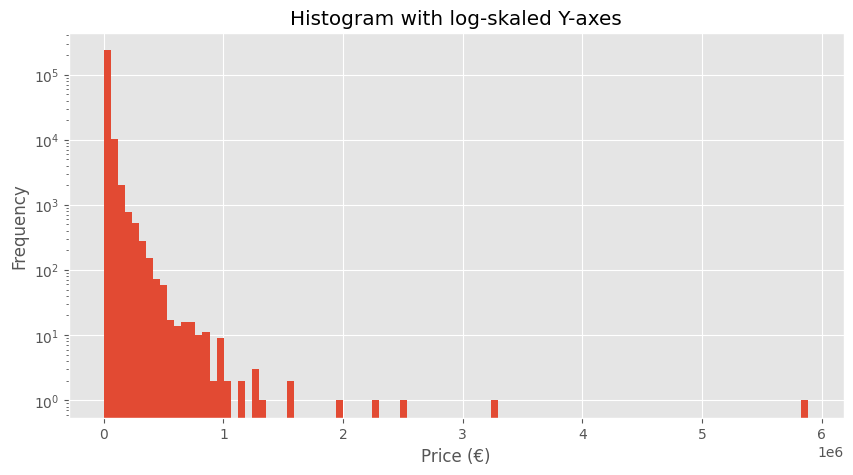

In [86]:
plt.figure(figsize=(10, 5))
df['price_in_euro'].plot(kind='hist', bins=100, log=True)
plt.xlabel('Price (€)')
plt.title('Histogram with log-skaled Y-axes')
plt.show()

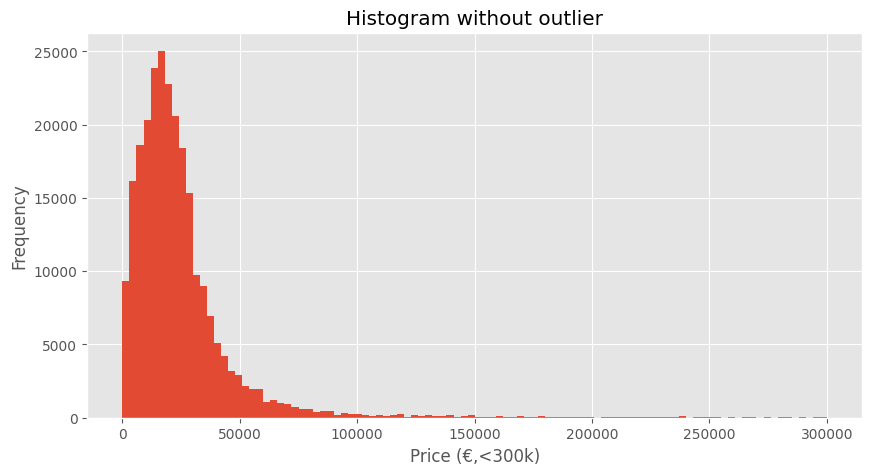

In [87]:
plt.figure(figsize=(10, 5))
df[df['price_in_euro'] < 300000]['price_in_euro'].plot(kind='hist', bins=100)
plt.xlabel('Price (€,<300k)')
plt.title('Histogram without outlier')
plt.show()

die Zielvariable ist rechtsschief verteilt, das ist typisch für Preise. Der Großteil der Preise liegt im unteren Bereich, während es aber auch einige Ausreißer nach oben gibt. 

In [88]:
#sns.pairplot(df, vars= df.select_dtypes(include=['int64', 'float64']).columns.tolist())

In [89]:
'''df_segmente = pd.read_csv('df_mit_segment.csv')
join_df = df_segmente[['model', 'segment']].drop_duplicates().reset_index(drop= True).copy()
df = pd.merge(df, join_df, on = 'model').copy()'''

"df_segmente = pd.read_csv('df_mit_segment.csv')\njoin_df = df_segmente[['model', 'segment']].drop_duplicates().reset_index(drop= True).copy()\ndf = pd.merge(df, join_df, on = 'model').copy()"

In [90]:
def detect_outliers_iqr(df, group_col, target_col):
    outlier_flags = pd.Series(False, index=df.index)  # alle erstmal False

    for name, group in df.groupby(group_col):
        q1 = group[target_col].quantile(0.25)
        q3 = group[target_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (group[target_col] < lower) | (group[target_col] > upper)
        outlier_flags.loc[group[mask].index] = True  # korrekt zuordnen

    return outlier_flags

In [91]:
df['outlier'] = detect_outliers_iqr(df, 'model', 'price_in_euro')
price_outlier = df.groupby('model')['outlier'].sum().sort_values(ascending=False)

In [92]:
price_outlier

model
Volkswagen Golf        192
Opel Astra              87
Renault Megane          87
Skoda Octavia           73
Volkswagen Tiguan       73
                      ... 
Mercedes-Benz G 290      0
Mercedes-Benz G 300      0
Citroen C6               0
Mercedes-Benz G 400      0
smart smart #1           0
Name: outlier, Length: 1312, dtype: int64

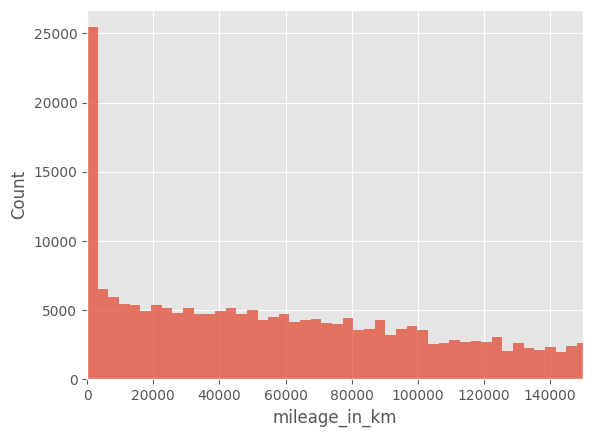

In [93]:
sns.histplot(data=df, x= 'mileage_in_km')
plt.xlim(0, 150000)
plt.show()